In [1]:
# Common DS
import pandas as pd
import numpy as np
import scipy.stats as stats
import wrangle

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Helpful Stuff
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%load_ext autoreload
%autoreload 2



# Exploratory Data Analysis

## 1. Why it matters - 3pt shooting teams win!

Can we also show in general the percentage of teams that win when having a lower 3pt percentage?

In [2]:
import explore

Train = 47167 rows (56.0%) | Validate = 20215 rows (24.0%) | Test = 16846 rows (20.0%)


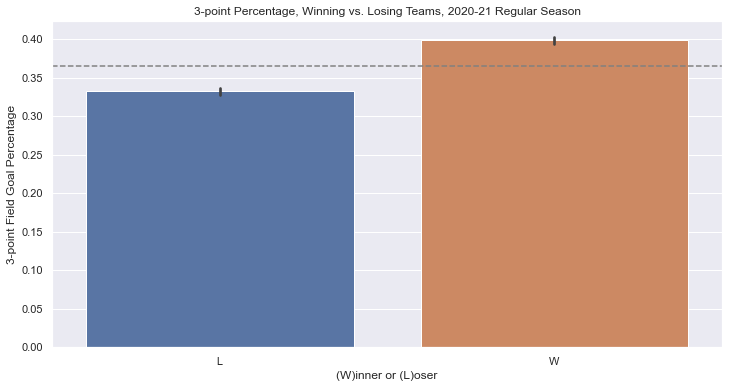

p/2 = 4.129281682776808e-79 (t = 19.59375713245642)
Null hypothesis rejected - the mean 3-point percentage is the higher for winning teams.


In [3]:
past_ten = explore.winner_3pct()

In [4]:
past_ten

season,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2020-21,cumulative
winner_3pct,0.385,0.377,0.389,0.390,0.378,0.383,0.391,0.389,0.385,0.399,0.387
loser_3pct,0.322,0.311,0.322,0.324,0.317,0.320,0.322,0.333,0.325,0.332,0.323
difference,0.063,0.066,0.068,0.066,0.061,0.063,0.068,0.056,0.061,0.066,0.064


> ###  Key Takeaway - teams that win have a mean 3pt pct of 38.7% over the past 10 years, while those who lose average 32.3% from three (a 6.4% difference)

-----

### Importing our data frame 

In [6]:
df, df_outlier_3pt, X_train_exp, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.wrangle_prep()

Train = 47167 rows (56.0%) | Validate = 20215 rows (24.0%) | Test = 16846 rows (20.0%)


## 2. Visualizing the numeric variables distribution

(-41.35000000000001, 934.3500000000001, 0.0, 7555.8)

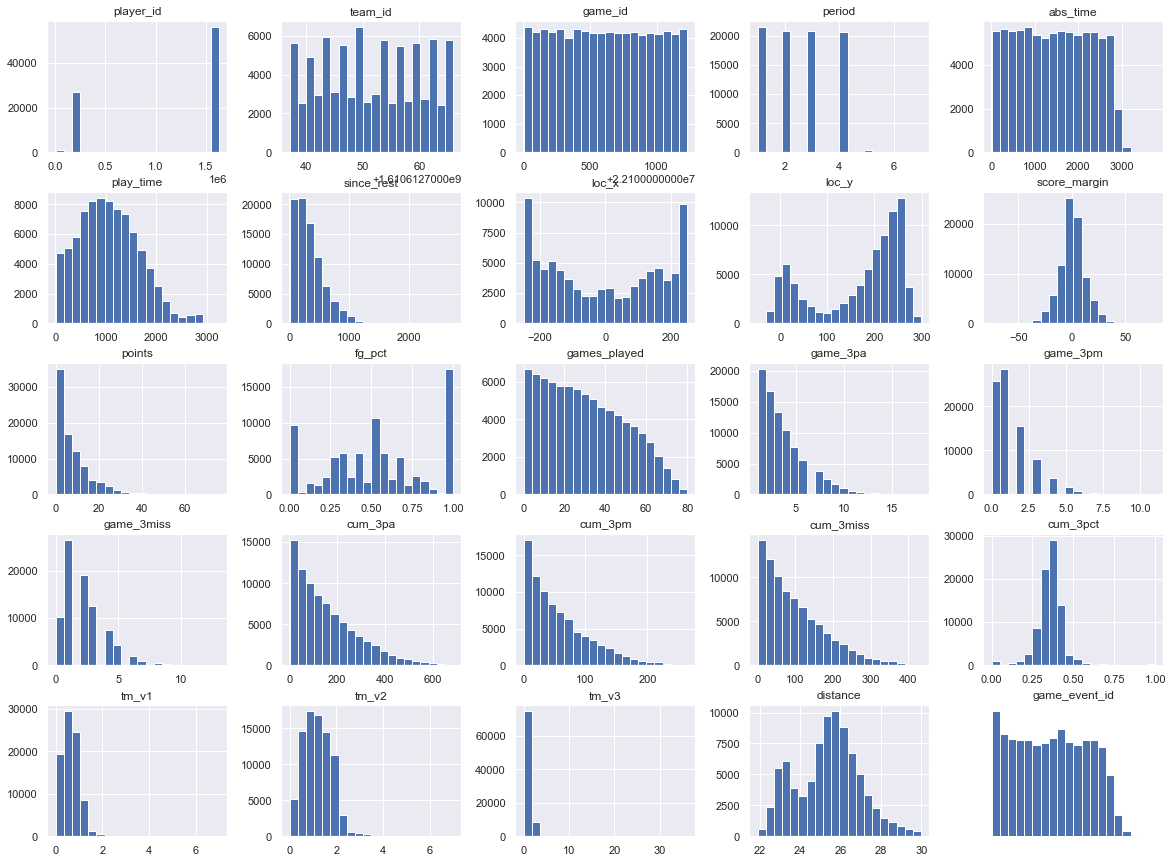

In [7]:
df.hist(bins = 20, figsize=(20,15))
plt.axis('off')

## Takeaways 
#### 1. Majority of the players have a mean play_time of  "1000 minutes" the distribution is skewed towards players resting earlier than not 
#### 2. Score_margin seems to be normally distributed with majority of the teams playing within a margin of -10 and +10 points
#### 3. Shooting distance also seems to show that majority of the shots are taken within the 23 and 26 feet range

>---

----

## 3. Correlation between features (heatmap)

##### Bring in split dataframes

In [8]:
from wrangle import wrangle_prep

#### Variable Exploration

In [9]:
exp = X_train_exp.copy()

In [10]:
exp.columns

Index(['player', 'player_id', 'team', 'team_id', 'game_id', 'home', 'period',
       'abs_time', 'play_time', 'since_rest', 'loc_x', 'loc_y', 'zone',
       'shot_type', 'score_margin', 'points', 'fg_pct', 'shot_result',
       'games_played', 'game_3pa', 'game_3pm', 'game_3miss', 'cum_3pa',
       'cum_3pm', 'cum_3miss', 'cum_3pct', 'tm_v1', 'tm_v2', 'tm_v3',
       'distance', 'game_event_id', 'shot_made_flag'],
      dtype='object')

In [11]:
cont_cols = ['since_rest','score_margin','games_played','cum_3pct', 'tm_v2', 'distance']

In [12]:
cat_cols = ['home', 'period','zone']

In [13]:
target = 'shot_result'

In [14]:
target_encoded = 'shot_made_flag'

### Heatmap:

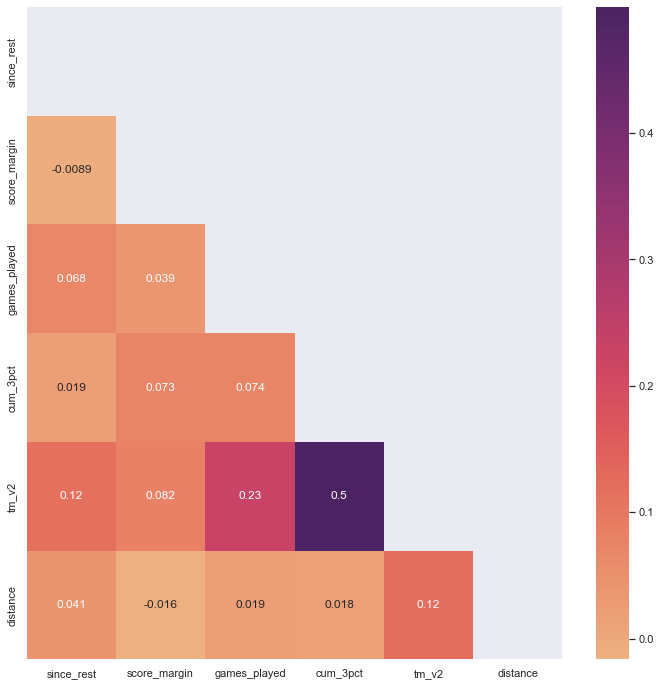

In [15]:
# Create a correlation matrix from the continuous numerical columns
df_cont_cols = exp[cont_cols]
corr = df_cont_cols.corr()

# Pass correlation matrix on to sns heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap="flare", mask=np.triu(corr))
plt.show()

> ### Heatmap Key Takeaway - Not counting the features that are similarly construced (cum_3pct, tm_v1 - tm_v3) or naturally correlated (points to abs_time and play_time) the standout feature is 'since_rest' that is correlated with our best metric, tm_v2, as well as points.

## 4. Exploring categorical variables for the season

<AxesSubplot:xlabel='rest_bin', ylabel='count'>

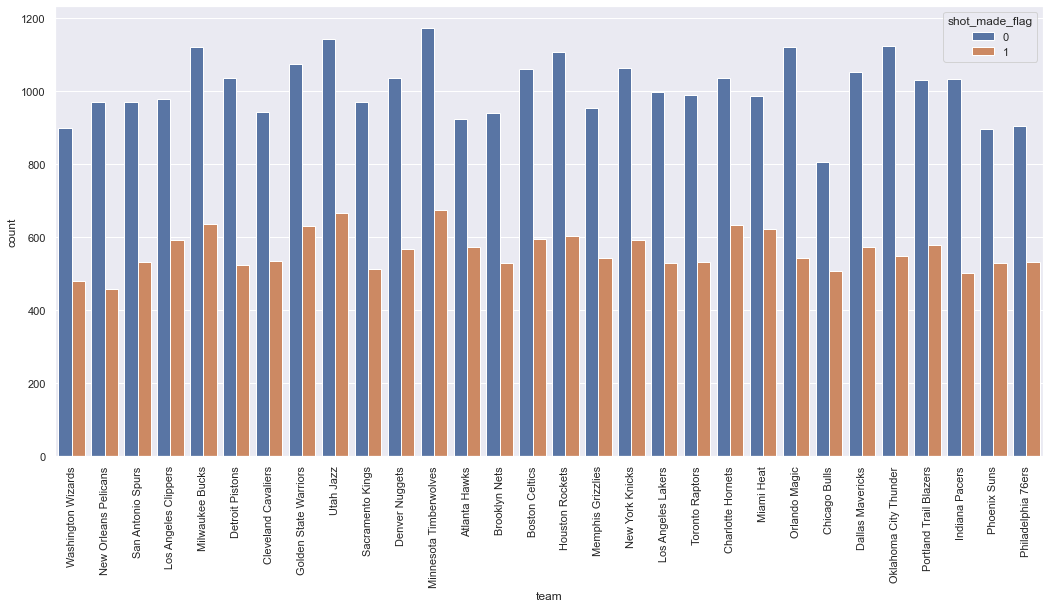

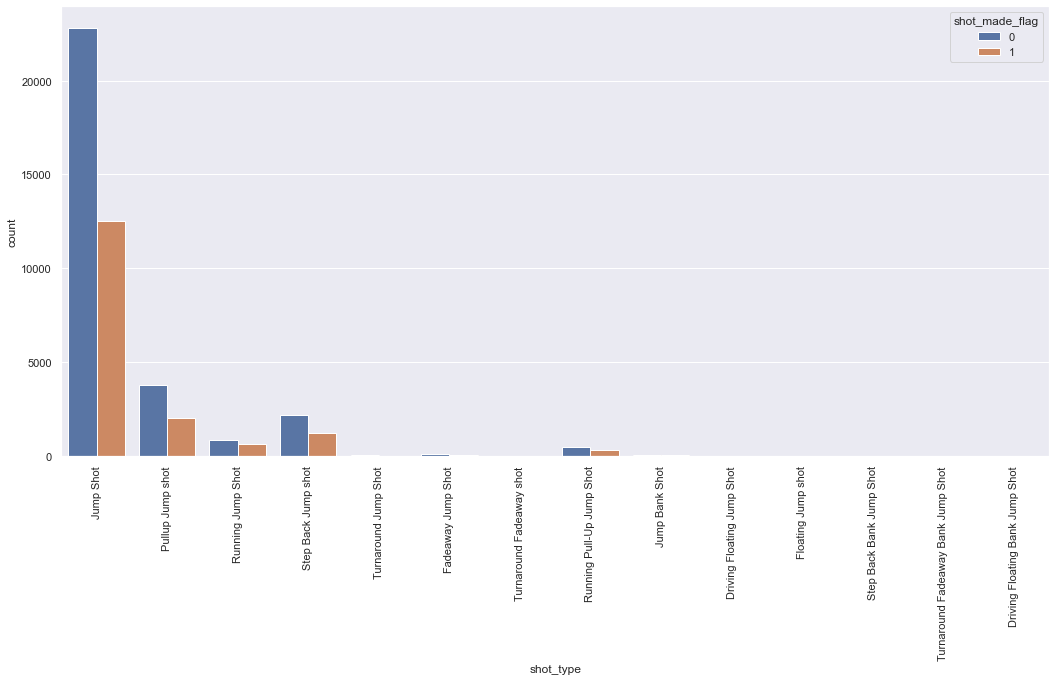

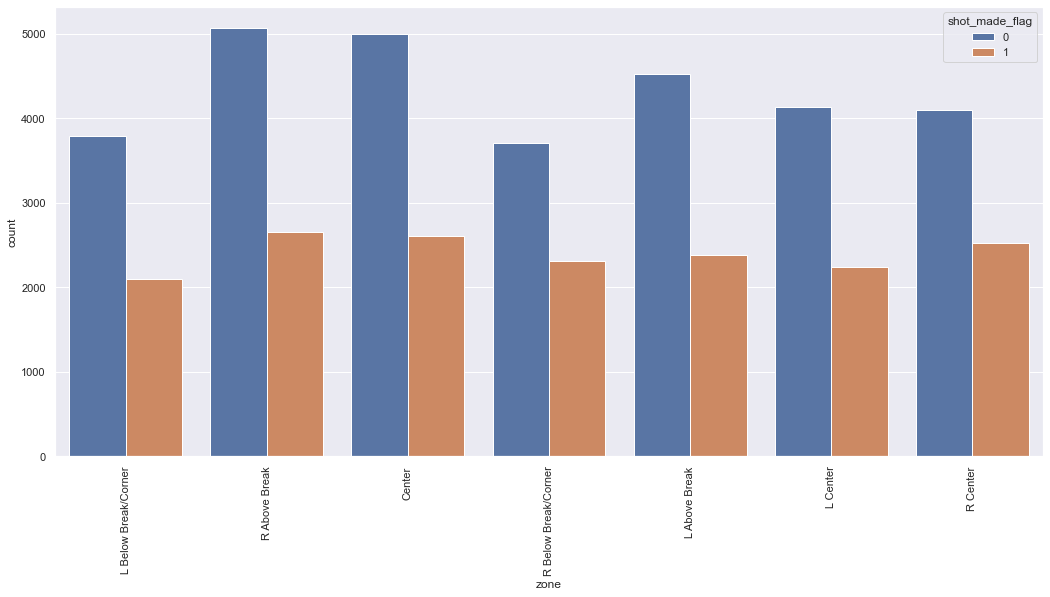

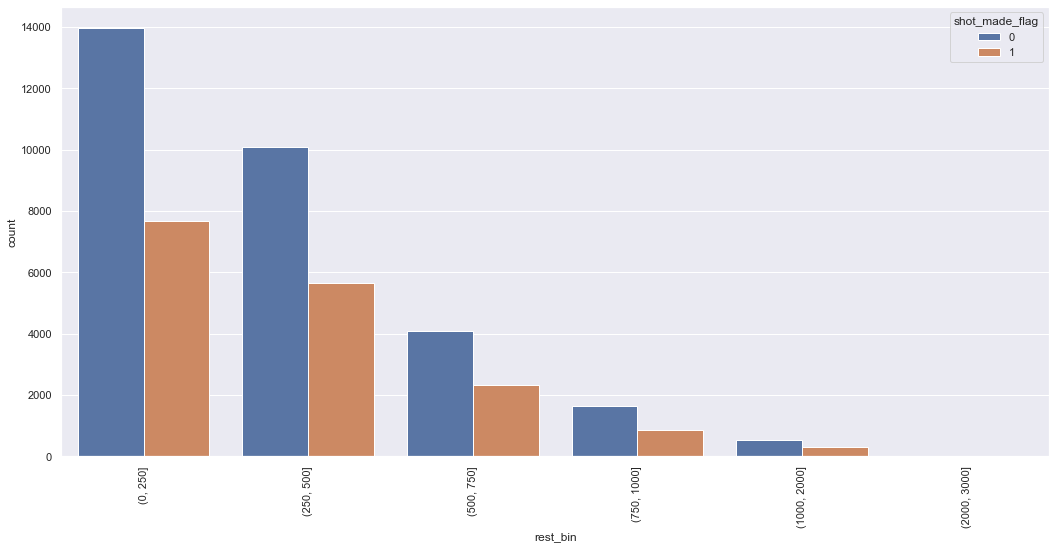

In [16]:
explore.plot_categorical()

## Takeaways
#### 1. The first chart illustrates how teams shot across the league
    - certain teams like the Warriors and the Timberwolves stick out, having shot more three point shots than other teams
#### 2. The second chart shows the preferred  3 point shot types for the season
    - majority of the league's shots were in the jump shot and pull up jumpshot category. This feature might not be as predictive to our model so it might be a candidate for feature elimination
#### 3.  The third chart shows a distribution of the shots across the 3 point zones 
    - it appears that the most popular zones are the center and right above break
    - the least popular zone right below break/ corner 

----

## 5. Categorical variables against target

### Step 1 - Plotting

### Step 2 - Run chi squared

In [18]:
# Set alpha:
a = .05

## Home/Away vs. Shot Result:

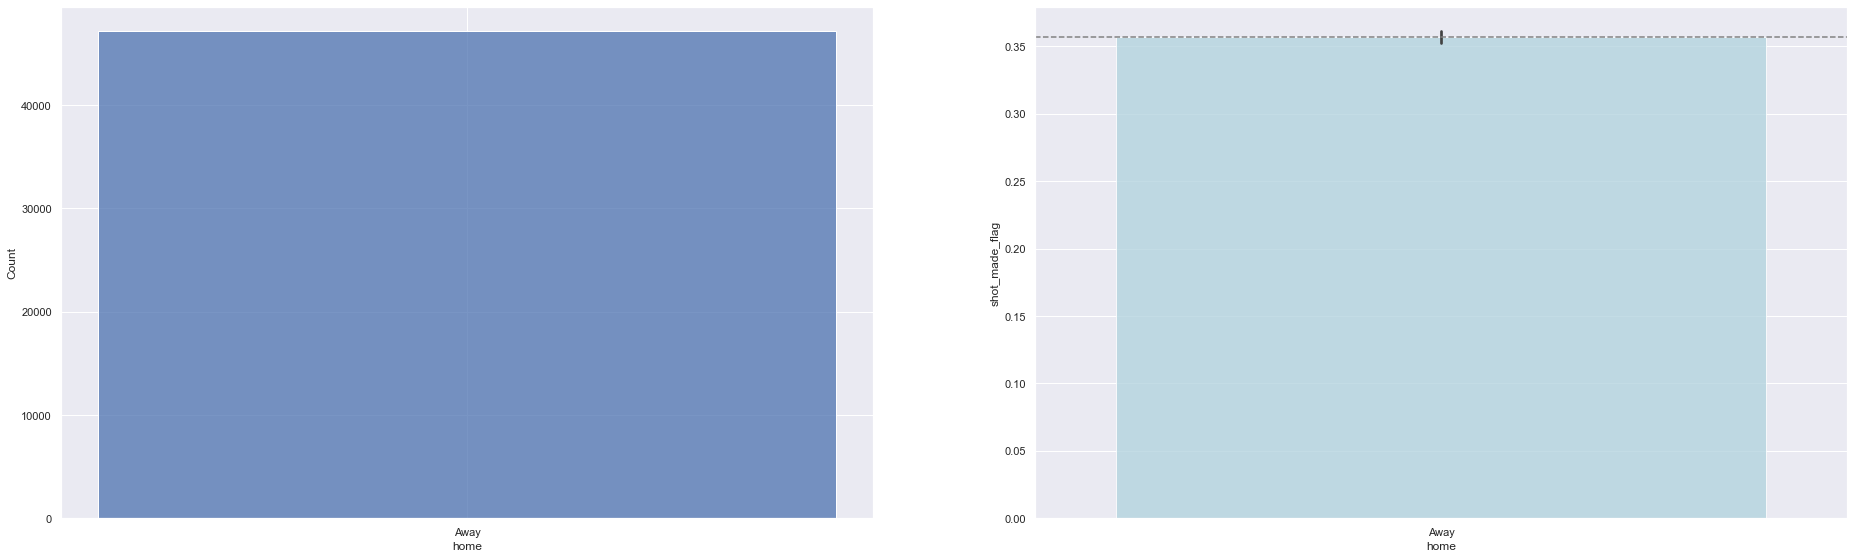

In [49]:
exp['home'] = np.where(exp.home == True, "Home","Away")
plt.figure(figsize=(32,32))
plt.subplot(3, 2, 1)
sns.histplot(exp.home)    
plt.subplot(3, 2, 2)
sns.barplot(x = exp.home, y = target_encoded, data=exp, alpha=.8, color='lightblue')
plt.axhline(exp[target_encoded].mean(), ls='--', color='gray')

plt.show()

In [ ]:
sns.histplot(data = X_train_exp, x=X_train_exp.period, hue = "shot_result", multiple = "stack")

In [19]:
observed = pd.crosstab(exp.home, exp.shot_result)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'Chi-square = {chi2}')
if p < a:
    print(f'p = {p}, therefore, rejects the null hypothesis.')
else:
    print(f'p = {p}, therefore fail to reject the null hypothesis.')    

Chi-square = 0.027377924884132168
p = 0.8685797591403985, therefore fail to reject the null hypothesis.


> ### Key Takeaway - 3pt shooting percentage is independent of being on the road or at home.

## Period vs. Shot Result

<AxesSubplot:xlabel='period', ylabel='Count'>

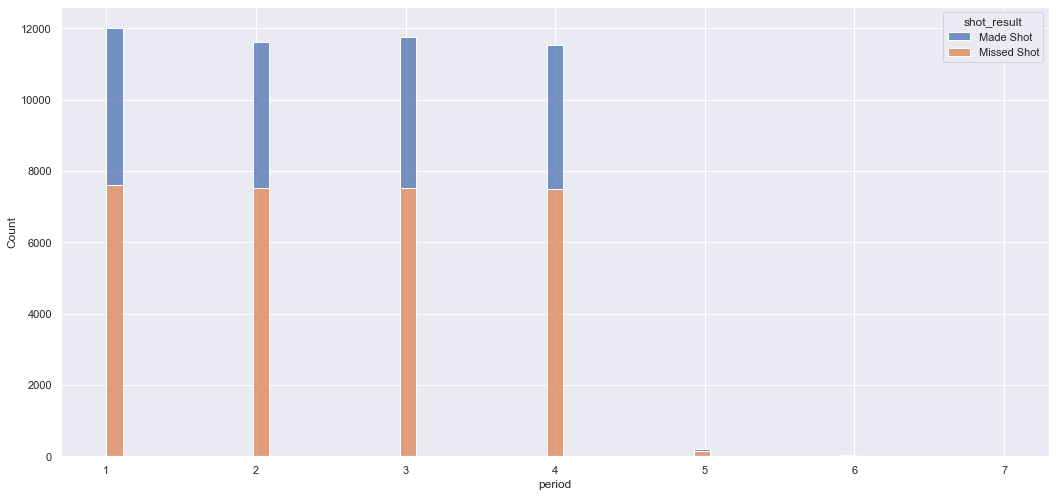

In [35]:
sns.histplot(data = X_train_exp, x=X_train_exp.period, hue = "shot_result", multiple = "stack")

In [20]:
observed = pd.crosstab(exp.period, exp.shot_result)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'Chi-square = {chi2}')
if p < a:
    print(f'p = {p}, therefore reject the null hypothesis.')
else:
    print(f'p = {p}, therefore fail to reject the null hypothesis.')    

Chi-square = 13.365956963162953
p = 0.03757892450567995, therefore reject the null hypothesis.


> ### Key Takeaway - there is a slight dependence of 3pt shooting on period, it appears mostly in the fourth quarter.  Overall, even though this fails to reject the null hypothesis, beyond saying 3pt shooting slightly ebbs in the fourth quarter we do not feel it is impactful.  We believe there may be more fourth quarter 'outlier' shots, outliers in that they aren't captured as outliers but are shots that are either rushed a bit to catch up in score if the player is down, or simply taken by a player when they are up big to practice a shot spot.

## Zone vs. Shot Result

<AxesSubplot:xlabel='zone', ylabel='Count'>

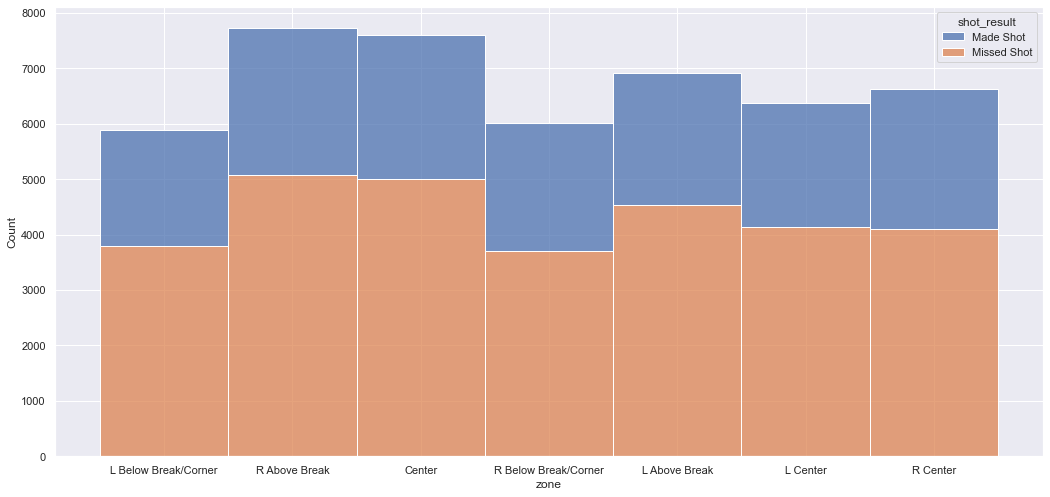

In [34]:
sns.histplot(data = X_train_exp, x=X_train_exp.zone, hue = "shot_result", multiple = "stack")

In [21]:
observed = pd.crosstab(exp.zone, exp.shot_result)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'Chi-square = {chi2}')
if p < a:
    print(f'p = {p}, therefore, rejects the null hypothesis.')
else:
    print(f'p = {p}, therefore fail to reject the null hypothesis.')    

Chi-square = 54.89269600655561
p = 4.872613048323041e-10, therefore, rejects the null hypothesis.


> ### Key Takeaway - Looking at the chart, we see that hitting a 3pt shot is dependent on shooting location.  If shooting from below the break/corner on either side, players hit threes at or above average rate; right center is also a higher than mean probability shot.  A left center shot is within the confidence interval of the mean but on average is lower, and right above break, left above break and center are the lowest percentage of threes - althought they also represent the most threes shot so it could mean that defeneses have adjusted to those higher three point attempt zones - either because they know they are harder to hit, or because they know other shots, such as the corner, are easier to hit so they defend those places harder.

----

## 6. Continuous Variables Against Target

### Step 1 - Plotting

### Distance vs. Shot Result (one-sided t-test)

In [22]:
# Set alpha:
a = .05

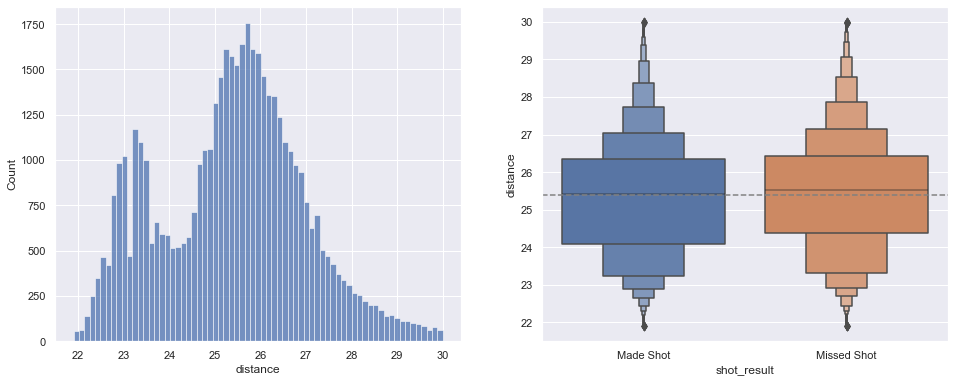

In [23]:
cont_cols = ['since_rest','score_margin','games_played','cum_3pct', 'tm_v2', 'distance']
plt.figure(figsize=(16,80))        
plt.subplot(11, 2, 1)
sns.histplot(exp.distance)
        
plt.subplot(11, 2, 2)
sns.boxenplot(y = exp.distance, x = 'shot_result', data=exp)
plt.axhline(exp.distance.mean(), ls='--', color='gray')

In [24]:
distance_made = exp[exp.shot_result == 'Made Shot'].distance
distance_missed = exp[exp.shot_result == 'Missed Shot'].distance
t, p = stats.ttest_ind(distance_made, distance_missed, equal_var=True)
print(f't = {t}')
if p/2 < a:
    print(f'p = {p}, therefore, rejects the null hypothesis.')
else:
    print(f'p = {p}, therefore fail to reject the null hypothesis.')

t = -7.177195052233609
p = 7.22023461387387e-13, therefore, rejects the null hypothesis.


> ### Key Takeaway - We reject that null hypothesis that shooting from a further distance has an equal or greater probability of hitting the shot than from shooting at a closer distance.  Therefore, players are better when shooting from a close distance (correlates with zones, as the below break/corner 3pt shots are at a closer distance.

### TM_V2 vs. Shot Result (one-sided t-test):

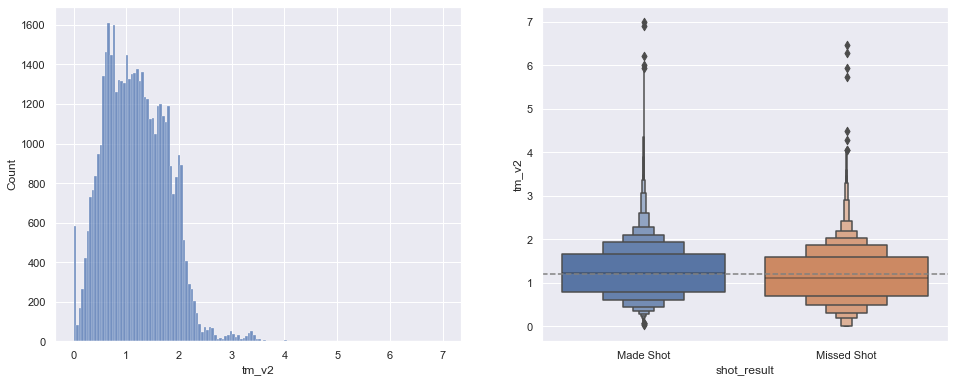

In [25]:
cont_cols = ['since_rest','score_margin','games_played','cum_3pct', 'tm_v2', 'distance']
plt.figure(figsize=(16,80))        
plt.subplot(11, 2, 1)
sns.histplot(exp.tm_v2)
        
plt.subplot(11, 2, 2)
sns.boxenplot(y = exp.tm_v2, x = 'shot_result', data=exp)
plt.axhline(exp.tm_v2.mean(), ls='--', color='gray')

> ### Key Takeaway - We reject that null hypothesis that players who make shots have the same or lower tm_v2 score than those who miss shots.  Therefore tm_v2 score is a good indicator of whether a player hits a three point shot.

### Time since rest vs. Shot Result (one-sided)

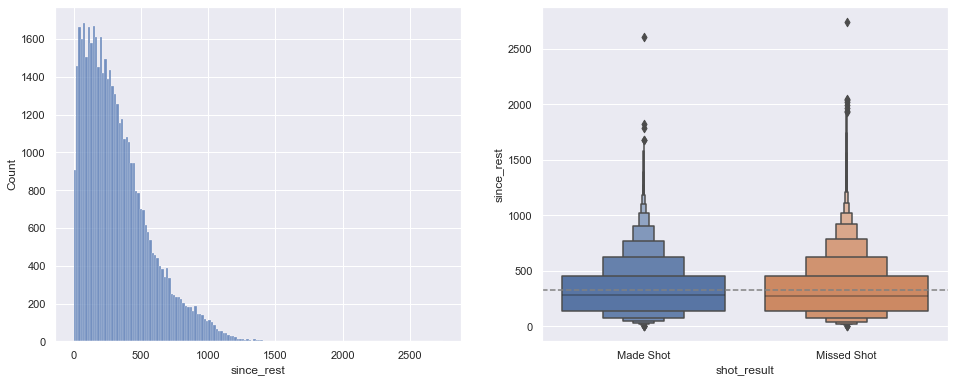

In [26]:
cont_cols = ['since_rest','score_margin','games_played','cum_3pct', 'tm_v2', 'distance']
plt.figure(figsize=(16,80))        
plt.subplot(11, 2, 1)
sns.histplot(exp.since_rest)
        
plt.subplot(11, 2, 2)
sns.boxenplot(y = exp.since_rest, x = 'shot_result', data=exp)
plt.axhline(exp.since_rest.mean(), ls='--', color='gray')

> ### Key Takeaway - We fail to reject the null hypothesis that players with the same or longer time since rest hit 3pt shots with the same percentage as those with less time since rest.  We strongly suspected that time since rest would have a negative impact on hitting a three, but looks like it does not.

### Score Margin vs Shot Result (one-sided t-test) 

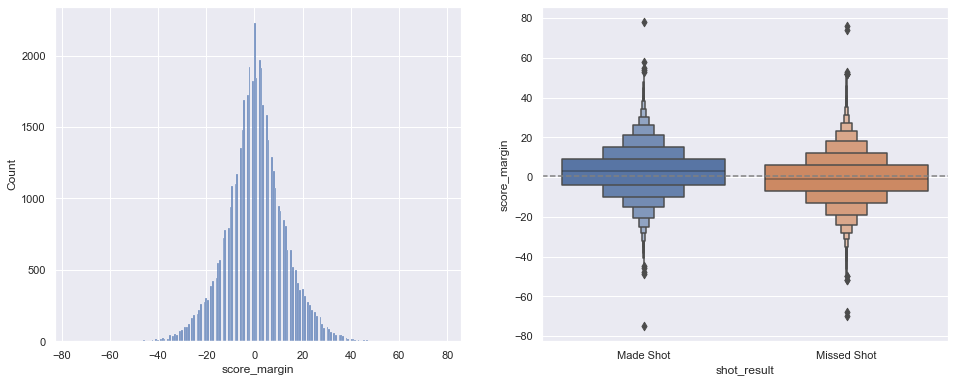

In [27]:
cont_cols = ['since_rest','score_margin','games_played','cum_3pct', 'tm_v2', 'distance']
plt.figure(figsize=(16,80))        
plt.subplot(11, 2, 1)
sns.histplot(exp.score_margin)
        
plt.subplot(11, 2, 2)
sns.boxenplot(y = exp.score_margin, x = 'shot_result', data=exp)
plt.axhline(exp.score_margin.mean(), ls='--', color='gray')

In [28]:
scoremarginmade = exp[exp.shot_result == 'Made Shot'].score_margin
scoremarginmissed = exp[exp.shot_result == 'Missed Shot'].score_margin
t, p = stats.ttest_ind(scoremarginmade, scoremarginmissed, equal_var=True)
print(f't = {t}')
if p < a:
    print(f'p = {p}, therefore, rejects the null hypothesis.')
else:
    print(f'p = {p}, therefore fail to reject the null hypothesis.')

t = 28.22832375484482
p = 7.3878006985133915e-174, therefore, rejects the null hypothesis.


> ### Key Takeaway - We reject the null hypothesis that there is no difference in 3pt shot making ability when having a lower or the same score margin.  Therefore, when up in score, players seem to have more confidence in their shots, and hit more.

### Games Played vs Shot Result (two-sided t-test)

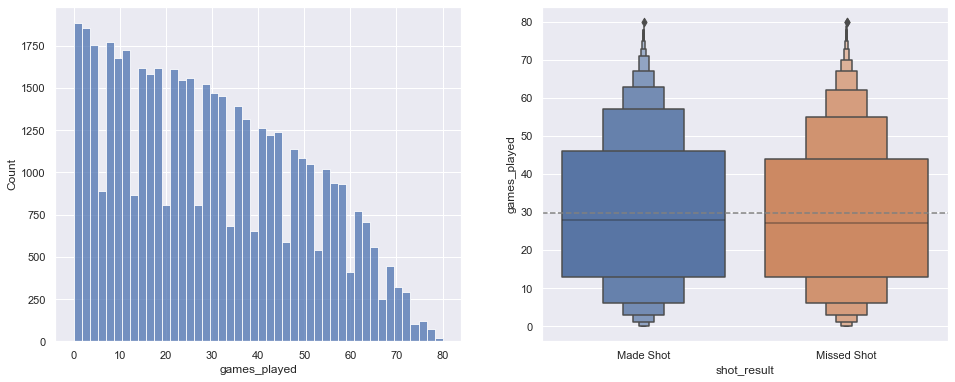

In [29]:
cont_cols = ['since_rest','score_margin','games_played','cum_3pct', 'tm_v2', 'distance']
plt.figure(figsize=(16,80))        
plt.subplot(11, 2, 1)
sns.histplot(exp.games_played)

plt.subplot(11, 2, 2)
sns.boxenplot(y = exp.games_played, x = 'shot_result', data=exp)
plt.axhline(exp.games_played.mean(), ls='--', color='gray')

##### First check t-test Assumptions:
- Indepedent? - YES, tm_v2 which includes 3pt shot data uses data from *before* the shot being analyzed.
- Normally Distributed? - YES, the only feature that isn't normally distributed is games played, but there are enough datapoints here to satisfy the central limit theorem.
- Equal variances? - Yes, all variances are close:

In [30]:
gpmade = exp[exp.shot_result == 'Made Shot'].games_played
gpmissed = exp[exp.shot_result == 'Missed Shot'].games_played
t, p = stats.ttest_ind(gpmade, gpmissed, equal_var=True)
print(f't = {t}')
if p < a:
    print(f'p = {p}, therefore, rejects the null hypothesis.')
else:
    print(f'p = {p}, therefore fail to reject the null hypothesis.')

t = 4.590733982867856
p = 4.428279561594994e-06, therefore, rejects the null hypothesis.


> ### Key Takeaway - We reject the hypothesis that 3pt shooting is the same between players with different games played.  Players who play more games typically have a higher shot percetnage.  Makes sense since those playing more games are typically better shooters. Especially since our dataset is only 3pt shooters.

### Step 2 - Based on the charts, run independent t-tests on following features: distance, tm_v2, since_rest, score_margin, games_played

In [31]:
for i in ['distance','tm_v2','since_rest','score_margin','games_played']:
    print(f'{i} variances:','Made:',exp[exp.shot_result == 'Made Shot'][i].var(),' Missed:',exp[exp.shot_result == 'Missed Shot'][i].var())


distance variances: Made: 2.493132458256492  Missed: 2.508762250540079
tm_v2 variances: Made: 0.34168733122309514  Missed: 0.3569052547455416
since_rest variances: Made: 59764.81340611715  Missed: 62816.30713581885
score_margin variances: Made: 137.96665412462073  Missed: 141.42858078459133
games_played variances: Made: 392.53915795324485  Missed: 381.6564513199287


----

# * Player binning - To find elites using tm_v2 score

In [32]:
# Create a Series of v2 scores, binned by player
tm_v2_scores = df.groupby('player').tm_v2.mean()
# Calculate the std and mean
stddev = tm_v2_scores.std()
meanscore = tm_v2_scores.mean()
# Create an elite cutoff score at two standard deviations above the mean
elites = meanscore + 2 * stddev
# Print the list of 'elite' players
tm_v2_scores[tm_v2_scores > elites].index

Index(['Anthony Edwards', 'Buddy Hield', 'CJ McCollum', 'Carmelo Anthony',
       'D'Angelo Russell', 'Desmond Bane', 'Devonte' Graham',
       'Donovan Mitchell', 'Duncan Robinson', 'Evan Fournier', 'Fred VanVleet',
       'Gary Trent Jr.', 'Grayson Allen', 'Jaylen Brown', 'Klay Thompson',
       'LaMelo Ball', 'LeBron James', 'Lonzo Ball', 'Luke Kennard',
       'Malik Beasley', 'Patty Mills', 'Paul George', 'Seth Curry',
       'Stephen Curry', 'Terry Rozier', 'Zach LaVine'],
      dtype='object', name='player')

# * Comparing two elite players  

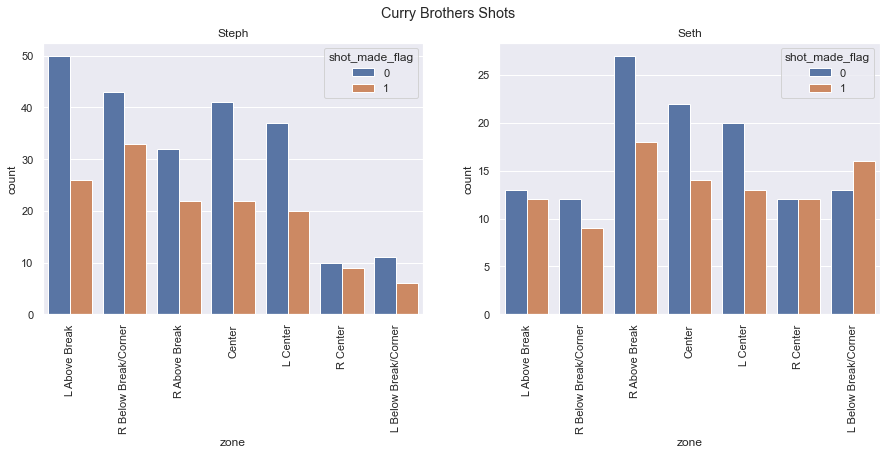

In [33]:
explore.plot_curry_bros()